In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving hotel.jpg to hotel.jpg


# Hotel Booking Cancellations  prediction

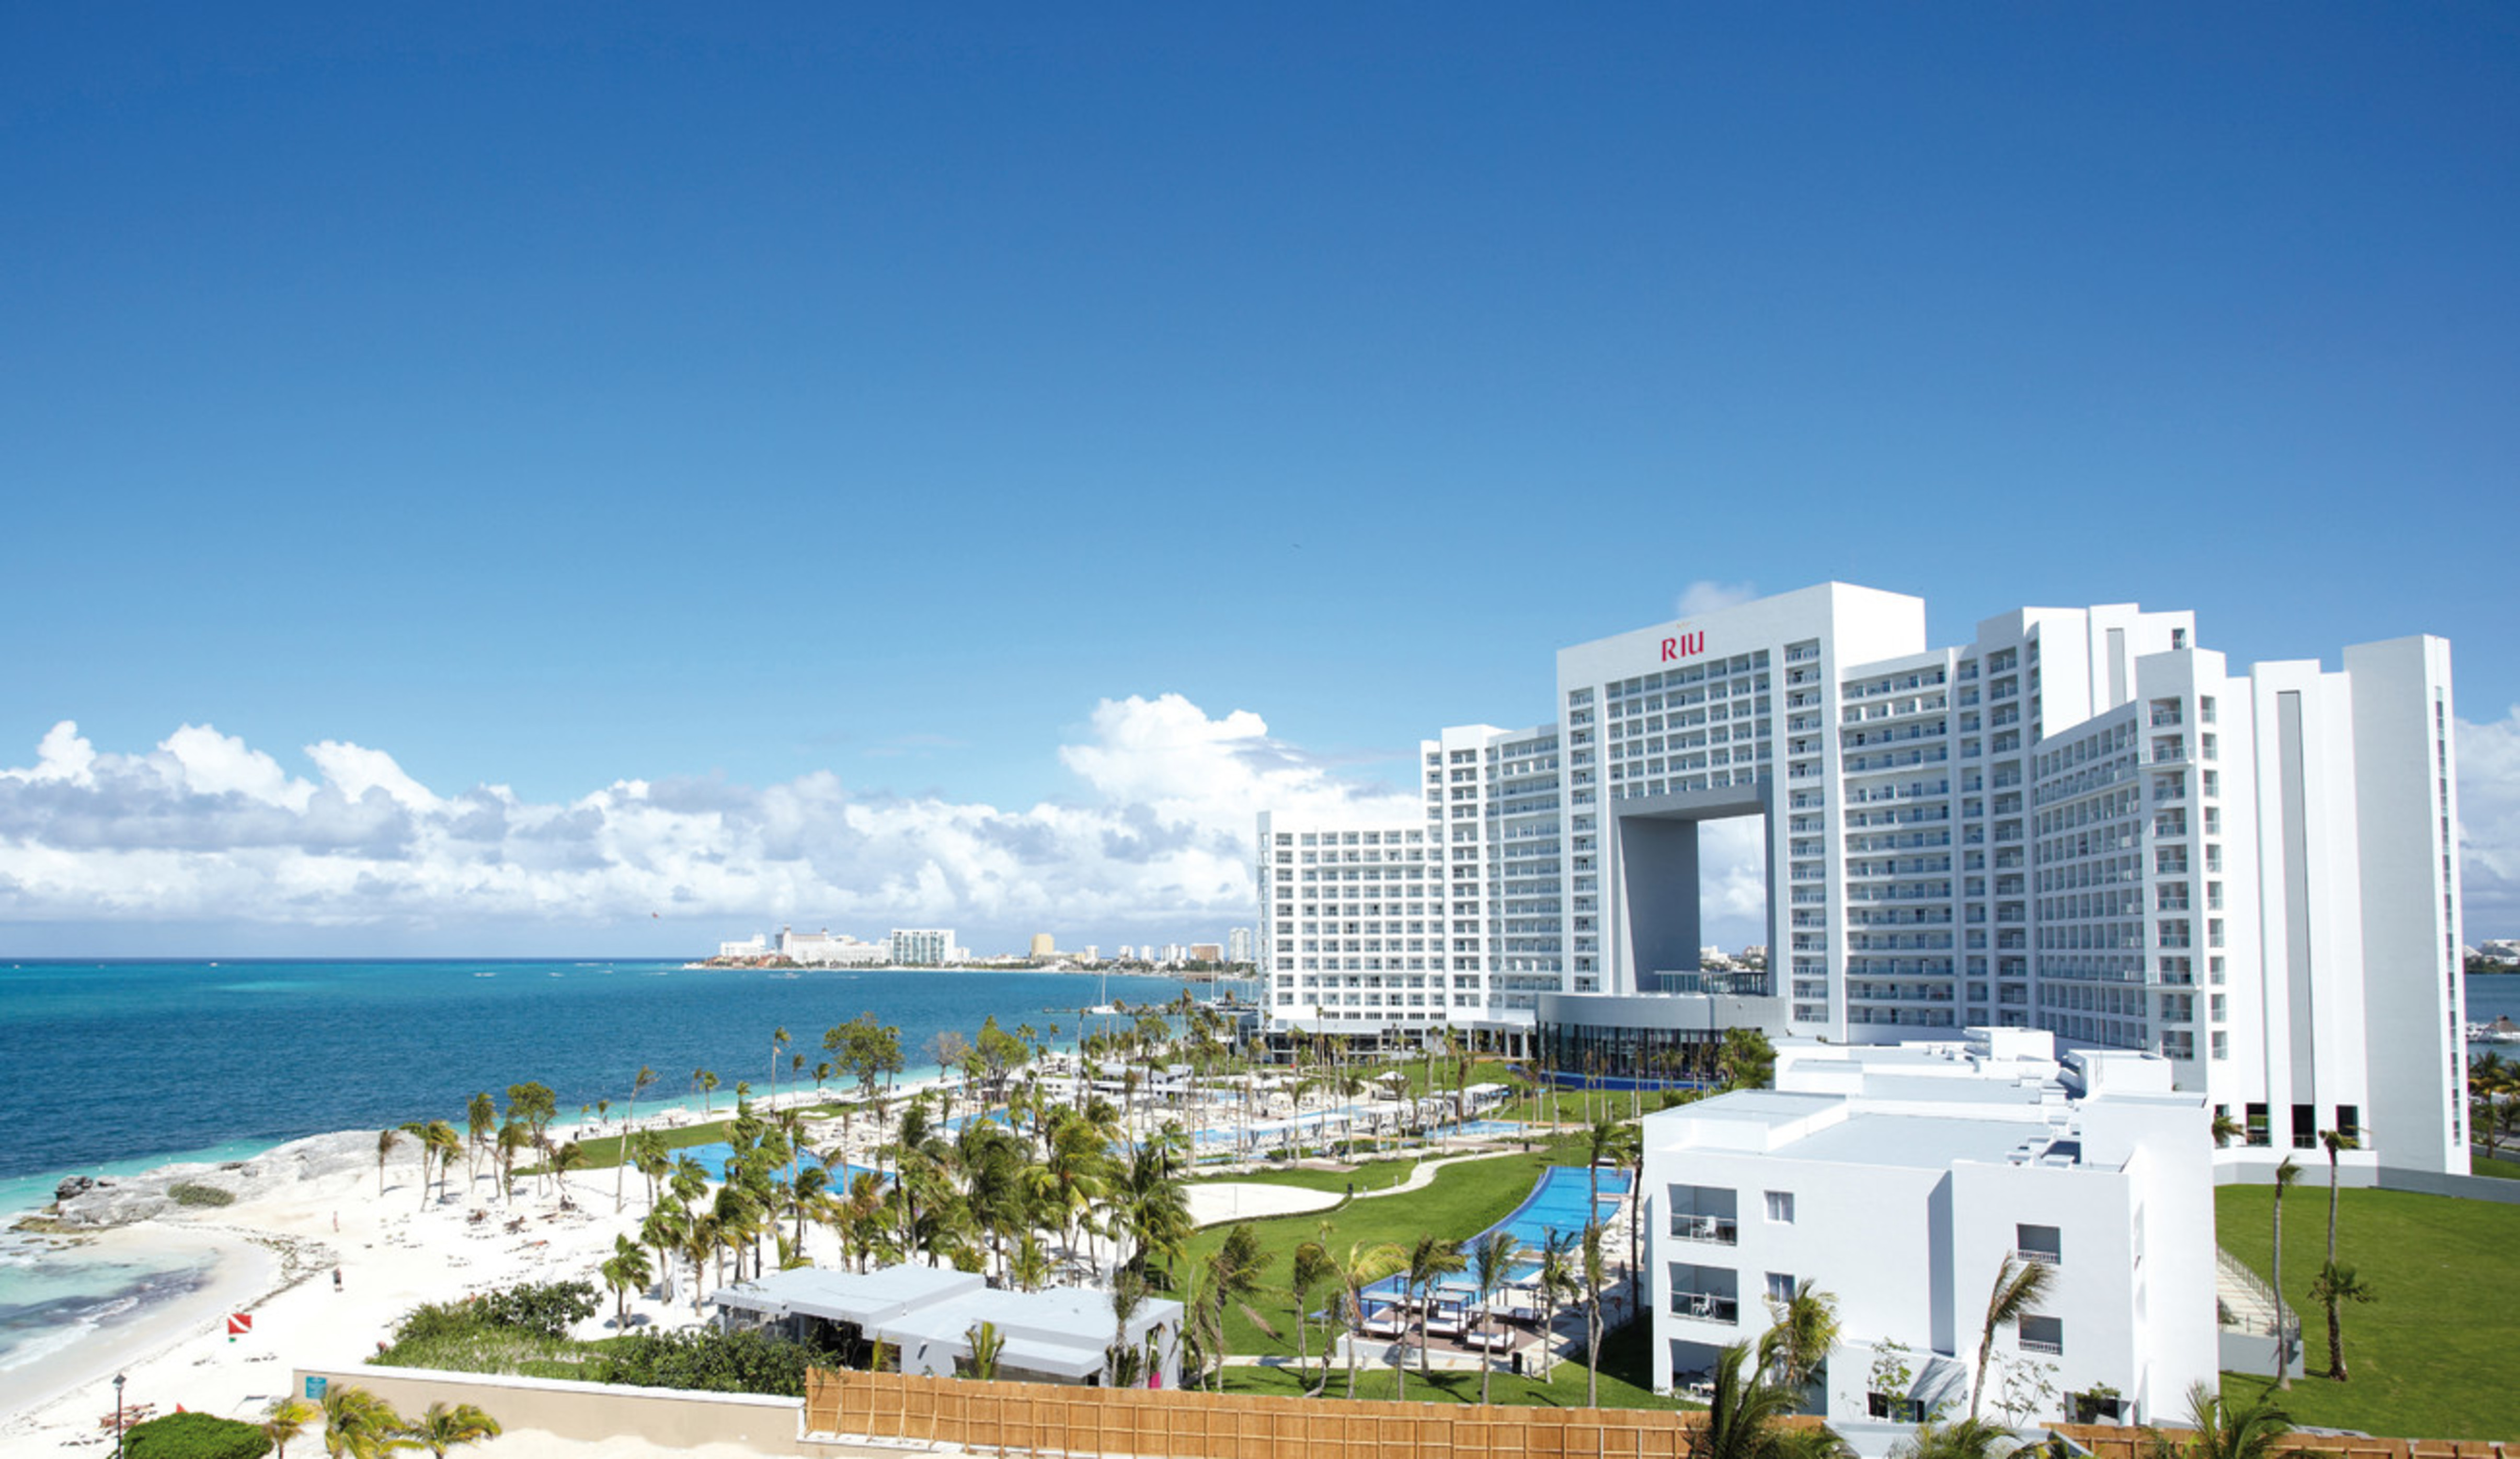

In [ ]:
Image('hotel.jpg',width = 600 ,height = 600,)

<h1>About the dataset </h1>
 <h2>
This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the years 2015 and 2017.
It shows that whether the booking done by the guests were cancelled or not.


*  hotel : There are two type of hotels resort hotel and city hotel.
*  is_canceled : Value indicating if the booking was canceled (1) or not (0).
*  lead_time : Number of days that elapsed between the entering date                         of booking into the PMS and the arrival date.
*  arrival_date_year : Year of arrival date  
*  arrival_date_month: Month of arrival date with 12 categories: “January” to
  “December”
*  arrival_date_week_number : Week number of the arrival date
*  arrival_date_day_of_month : Day of the month of the arrival date
*  stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*  stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
*  adults : Number of adults
*  children : Number of children
*  babies : Number of babies
*  meal : BB – Bed & Breakfast
*  country : Country of origin.
*  market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators
*  distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*  is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
*  previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
*  previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
*  reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons
*  assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
*  booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*  deposit_type : No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
*  agent : ID of the travel agency that made the booking
*  company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*  days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
*  customer_type : Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
*  adr : Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
*  required_car_parking_spaces : Number of car parking spaces required by the customer
*  total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
*  reservation_status : Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
*  reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [13]:
# Converting data set into dataframe
from google.colab import files
uploaded = files.upload()




Saving hotel_bookings 2.csv to hotel_bookings 2.csv


In [14]:
# importing some useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings 2.csv']))
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

#**Some** operations related to the data

In [56]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [16]:
# To print first n number of rows

print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [17]:
# To print last n number of rows

print(df.tail())




             hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                        

In [18]:
# To check for null values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
# To check for any nan value in the dataset

print(df.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
# Verifying that the data is clean

print(df.isna().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [23]:
# To display the list of columns

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [61]:
# To describe the DataFrame

print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  118898.000000  118898.000000      118898.000000   
mean        0.371352     104.311435        2016.157656   
std         0.483168     106.903309           0.707459   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118898.000000              118898.000000   
mean                  27.166555                  15.800880   
std                   13.589971                   8.780324   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

# Exploratory Data Analysis

In [69]:
# to convert date column with object type data into datetime data

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'] )


In [41]:
# to search for the object data type and givimg its description

df.describe(include = 'object')

for col in df.describe(include = 'object').columns :
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['October' 'November' 'May' 'June' 'December' 'January' 'March' 'February'
 'April' 'July' 'August' 'September']
meal
['BB' 'HB' 'SC' 'FB']
country
['PRT' 'AUT' 'ESP' 'ITA' 'FRA' 'DEU' 'BEL' 'CZE' 'GBR' 'NLD' 'USA' 'MEX'
 'CHE' 'AUS' 'BGR' 'CHN' 'ROU' 'IRL']
market_segment
['Online TA' 'Corporate' 'Direct' 'Groups' 'Offline TA/TO' 'Complementary']
distribution_channel
['TA/TO' 'Corporate' 'Direct' 'GDS']
reserved_room_type
['E' 'A' 'D' 'H' 'C']
assigned_room_type
['E' 'G' 'A' 'F' 'D' 'C' 'I' 'B' 'H']
deposit_type
['No Deposit' 'Non Refund' 'Refundable']
customer_type
['Transient' 'Transient-Party' 'Group' 'Contract']
reservation_status
['Check-Out' 'Canceled' 'No-Show']


In [57]:
# To drop unrelevant columns

print(df.drop(['company','agent'],axis = 1,inplace =True))

None


In [58]:
# to drop rows having null values

print(df.dropna(inplace = True))


print(df.isnull())

None
        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119385  False        False      False              False               False   
119386  False        False      False              False               False   
119387  False        False      False              False               False   
119388  False        False      False              False               False   
119389  False        False      False              False               False   

        arrival_date_week_number  

In [59]:
print(df.is_canceled)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118898, dtype: int64


In [60]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  118898.000000  118898.000000      118898.000000   
mean        0.371352     104.311435        2016.157656   
std         0.483168     106.903309           0.707459   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118898.000000              118898.000000   
mean                  27.166555                  15.800880   
std                   13.589971                   8.780324   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [62]:
# To print the cancelled percentage of the bookings done
canceled_perc = df['is_canceled'].value_counts(normalize = True)
print(canceled_perc)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


In [63]:
print(df['is_canceled'].value_counts())

0    74745
1    44153
Name: is_canceled, dtype: int64


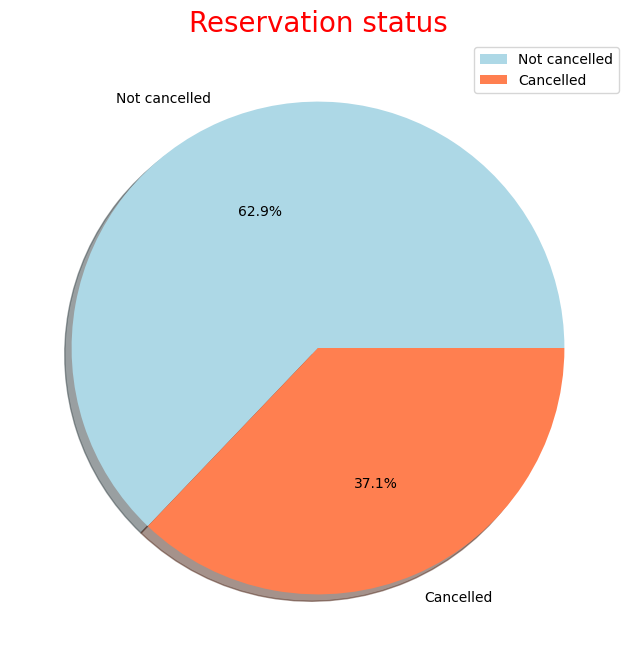

In [64]:

# displaying the reservation status through pie chart

value = df['is_canceled'].value_counts()

plt.figure(figsize = (10,8))
plt.pie(value, labels = ['Not cancelled','Cancelled'],colors = ['lightblue', 'coral'], shadow = True, autopct = "%.1f%%")
plt.title('Reservation status', color = 'red', size = 20)
plt.legend()
plt.show()


From the above figure we can infer that

*italicized text*
1.   62.9% of the bookings were not cancelled
2.   37.1 of the bookings were cancelled





0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: year, Length: 118898, dtype: int64


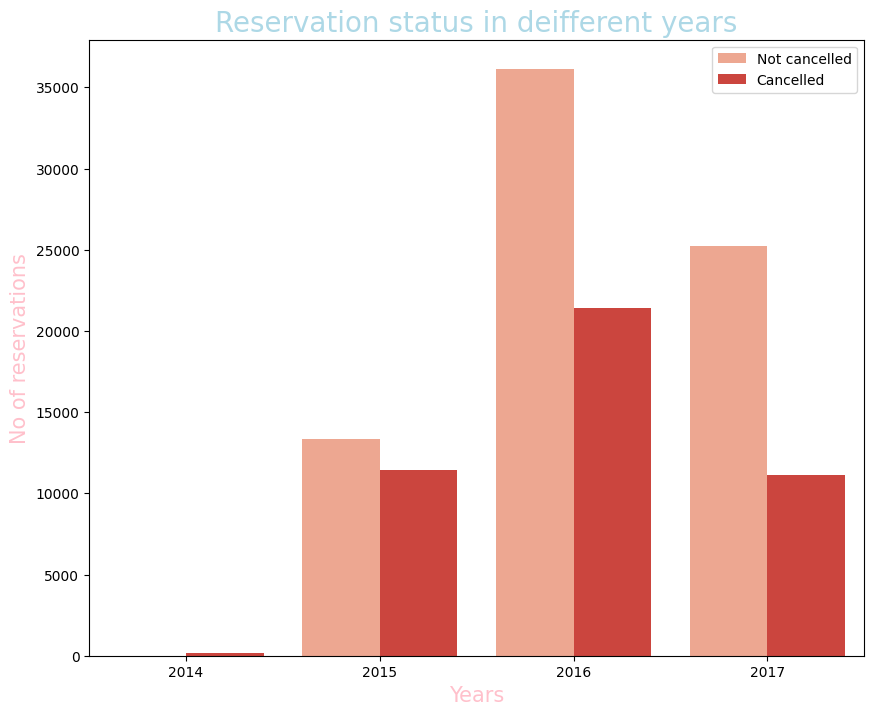

In [70]:
# Reservation status in different years  depicted by a countplot

df['year'] = df['reservation_status_date'].dt.year
print(df.year)

plt.figure(figsize = (10,8))
sns.countplot(x = 'year', hue = 'is_canceled', data = df, palette = 'Reds')
plt.title('Reservation status in deifferent years', color ='lightblue', size = 20)
plt.xlabel('Years', size = 15, color = 'pink')
plt.ylabel('No of reservations', size = 15 , color = 'pink')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

The above figure shows that
* The number of cancellations and the non-cancellations were maximum in the year 2016.
* Number of cancellations were least in the year 2015 and non-cancellations were least in the year 2017.

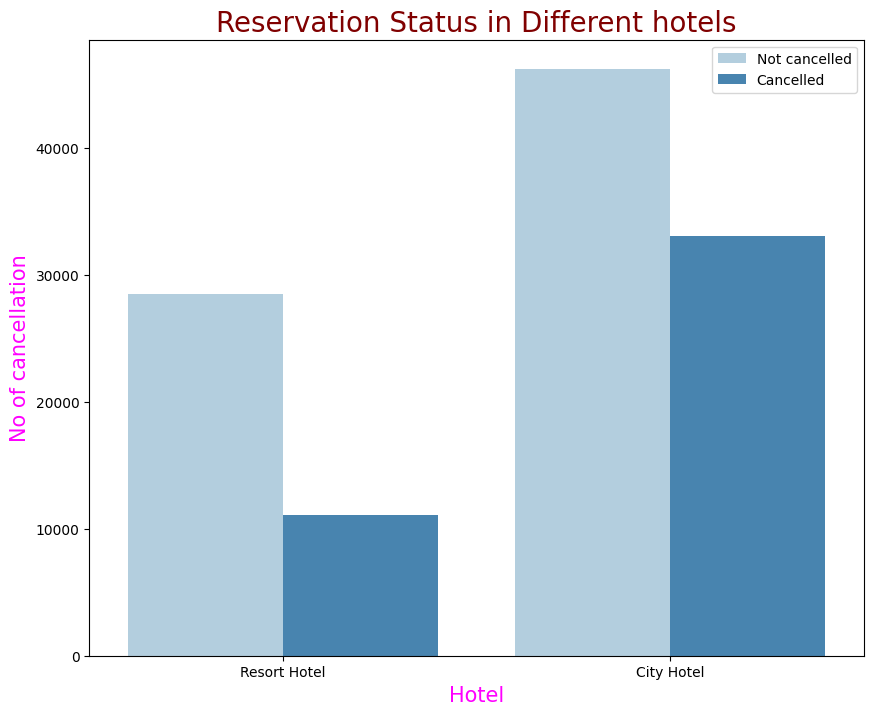

In [71]:
# Reservation status in city and resort hotels

plt.figure(figsize=(10,8))
ax1 = sns.countplot(x = 'hotel',hue = 'is_canceled',data = df, palette= 'Blues')
plt.title('Reservation Status in Different hotels', color = 'maroon',size = 20)
plt.xlabel('Hotel', size = 15 , color = 'magenta')
plt.ylabel('No of cancellation', size = 15, color = 'magenta')
plt.legend(['Not cancelled', 'Cancelled'])
plt.show()

From the above figure the insights which can be generated are
* city hotel saw the most number of cancellations and most bookings were also done in the city hotels.
* On the other hand resort hotel had less cancellations and non-cancellations as compared to the city hotel.

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64


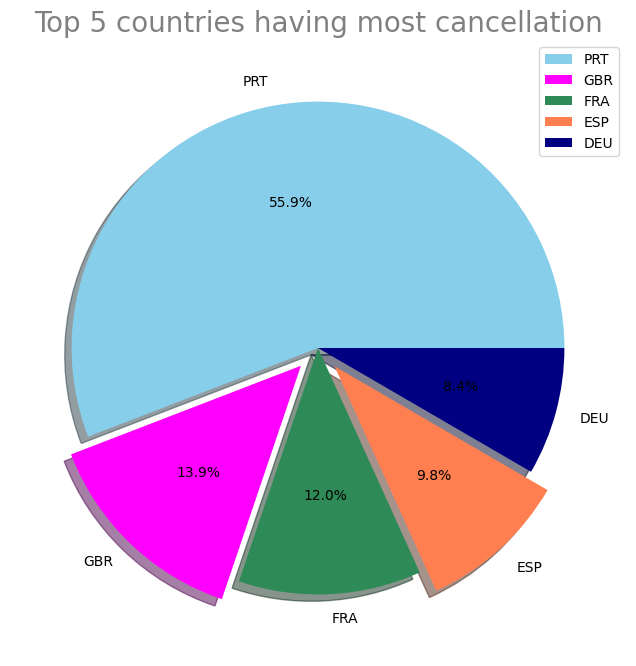

In [76]:
#  Top 5 countries having most cancellations

country = df.country.value_counts()[:5]
print(country)

plt.figure(figsize = (10,8))
plt.pie(country, labels = country.index , colors = ['skyblue','fuchsia','seagreen','coral','navy'],
        explode = (0,0.1,0,0.1,0), shadow = True  , autopct = "%.1f%%")
plt.title('Top 5 countries having most cancellation', size = 20 , color = 'gray')
plt.legend()
plt.show()

* Top 5 countries with most numer of cancellations are :
 *  PRT : 55.9%
 *  GBR : 13.9%
 *  FRA : 12.0%
 *  ESP :  9.8%
 *  DEU :  8.4%

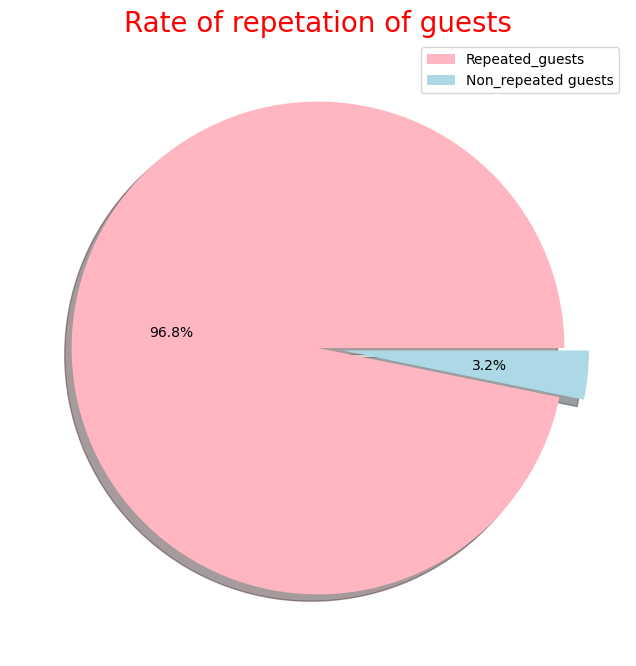

In [77]:
# percentage of repaeted guests in a particular hotel depicted by a pie chart

repeated_guests = df.is_repeated_guest.value_counts()

plt.figure(figsize = (10,8))
plt.pie(repeated_guests, colors= ['lightpink','lightblue'], explode = (0,0.1), autopct = '%1.1f%%',shadow = True )
plt.title('Rate of repetation of guests',size = 20, color = 'r' )
plt.legend(['Repeated_guests','Non_repeated guests'])
plt.show()

In [81]:
print(df['hotel'].value_counts())
print(df['country'].value_counts())
print(df['reserved_room_type'].value_counts())
print(df['assigned_room_type'].value_counts())


City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64
PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64
A    85601
D    19173
E     6497
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64
A    73863
D    25166
E     7738
F     3732
G     2539
C     2354
B     2159
H      708
I      357
K      279
P        2
L        1
Name: assigned_room_type, dtype: int64


#Performing Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [83]:
df['hotel'] = encoder.fit_transform(df['hotel'])
df['country'] = encoder.fit_transform(df['country'])
df['reserved_room_type'] = encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = encoder.fit_transform(df['assigned_room_type'])
df['is_canceled']   = encoder.fit_transform(df['is_canceled'])

In [84]:
# displaying the value counts of the various columns
print(df['hotel'].value_counts())
print(df['country'].value_counts())
print(df['reserved_room_type'].value_counts())
print(df['assigned_room_type'].value_counts())

0    79302
1    39596
Name: hotel, dtype: int64
135    48586
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
172        1
119        1
Name: country, Length: 177, dtype: int64
0    85601
3    19173
4     6497
5     2890
6     2083
1     1114
2      931
7      601
8        6
9        2
Name: reserved_room_type, dtype: int64
0     73863
3     25166
4      7738
5      3732
6      2539
2      2354
1      2159
7       708
8       357
9       279
11        2
10        1
Name: assigned_room_type, dtype: int64


# Declaring X and y variables



In [85]:
X = df[['country','is_repeated_guest','previous_cancellations',
       'previous_bookings_not_canceled','reserved_room_type','assigned_room_type','days_in_waiting_list','adr']]

y = df['is_canceled']

In [86]:
# displaying the x and y values

print(X)

print(y)

        country  is_repeated_guest  previous_cancellations  \
0           135                  0                       0   
1           135                  0                       0   
2            59                  0                       0   
3            59                  0                       0   
4            59                  0                       0   
...         ...                ...                     ...   
119385       15                  0                       0   
119386       56                  0                       0   
119387       43                  0                       0   
119388       59                  0                       0   
119389       43                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  \
0                                    0                   2   
1                                    0                   2   
2                                    0                   0   
3      

# Splitting the X and y variables into test and train

In [87]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y , test_size=0.5, random_state= 42 )


# Standardize The Dataset

In [88]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[9.30292015e+01 3.19265253e-02 8.59896718e-02 1.31507679e-01
 9.94583593e-01 1.32982893e+00 2.39911521e+00 1.02024643e+02]


In [89]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# Training of the model






In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [91]:
models = {'lr': LinearRegression(),
         'lor': LogisticRegression(),
          'tree' : DecisionTreeRegressor(),
          'RF' : RandomForestRegressor()
         }

In [92]:
for name , model in models.items():

     print(f'Training Model {name}: ')
     model.fit(X_train,y_train)
     y_pred = model.predict(X_test)
     print(f"r2_score{name}: ",r2_score(y_test,y_pred))
     print(f"MAE{name}: ",mean_absolute_error(y_test,y_pred))
     print(f"MSE{name}: ",mean_squared_error(y_test,y_pred))
     print('#--------------------------------------------------------')

Training Model lr: 
r2_scorelr:  0.1491038651701143
MAElr:  0.4066476973963534
MSElr:  0.1985140826742374
#--------------------------------------------------------
Training Model lor: 
r2_scorelor:  -0.24900386233726945
MAElor:  0.29139262224764084
MSElor:  0.29139262224764084
#--------------------------------------------------------
Training Model tree: 
r2_scoretree:  0.1618198342960836
MAEtree:  0.2691821297746776
MSEtree:  0.1955474468616768
#--------------------------------------------------------
Training Model RF: 
r2_scoreRF:  0.304090356622993
MAERF:  0.275535352816659
MSERF:  0.16235573159203653
#--------------------------------------------------------
